
## Image Registration : *Point-set registration*
***


Image registration is a fundamental component in computer vision used to align two images and recover the transformation mapping one to another. For instance, these images can be of the same object taken at different times, using different sensors, or from different perspectives. Its main application domains include medical imaging, remote sensing, and motion tracking. Based on the transformations involved, registration is categorized into:
* Rigid image registration
* Non-rigid image registration

Rigid image registration methods align the images by performing rotation, scaling and translation, while non-rigid image registration methods align the images through non-rigid geometric transformations as shown in the table below.



|Image 1|Image 2|Transformation
|:---:|:---:|:---:|:---:
|<img src="square.png",width=50,height=50>|<img src="square1.png",width=50,height=50>|Rotation, Translation|Rigid
| |<img src="square2.png",width=50,height=50>|Affine|Non-rigid
| |<img src="square3.png",width=50,height=50>|Non-linear|Non-rigid

 
Image registration methods are classified into two categories: 
1. Intensity-based
2. Feature-based

Intensity-based methods compare the intensity values at different pixels in the images, and try to find a transformation between the images. Feature-based methods try to find a transformation by aligning features, such as corners and boundary points, extracted from the image. A set of features extracted from the image is called a point set. The process of finding the alignment between two point sets is called point set registration. An example of point set registration is shown in figure below.


<img src="cpd.gif",width=300,height=300>

<div style="text-align: justify"> 
One of the widely used algorithms for point set registration is **Coherent Point Drift** (CPD). Here point set registration is treated as a density estimation problem and a variational approach is used to derive a multidimensional solution. CPD uses radial basis functions to simultaneously find both the transformation and correspondence between two point sets. The CPD algorithm uses a motion coherence constraint which ensures that all the points move in a coherent fashion, preserving the topological structure.
</div>


## Coherent Point Drift Algorithm
---

<div style="text-align: justify"> 

The coordinates of the reference point set are denoted as $X = [x_1, x_2, ... , x_N]^T$ and the coordinates of the template point set are denoted as $Y = [y_1, y_2, ... , y_M]^T$. The aim of the algorithm is to obtain the transformation $T$, which best aligns the template point set $Y$ with reference point set $X$. The point set registration is formulated as a density estimation problem, where  Gaussian misture model (GMM) centroids are fit to the data points, by maximizing the likelihood function. The points in $Y$ are considered as centroids of Gaussians and the points in $X$ are considered as data points. The non-rigid transformation $T$ which needs to be estimated, is defined as a continuous velocity function $v$, which is added to the initial centroid positions $Y$, such that the current position of the centroids can be given as, $T(Y,v) ￼ = Y + v(Y)$. The GMM probability density function is given as:
</div>

\begin{equation*}
p(x)=\sum_{m=0}^MP(y_m)p(x|y_m)
\end{equation*}


<div style="text-align: justify"> 
where, the first term represents the membership probability and the second term defines the Gaussian,
</div>

\begin{equation*}
p(x|y_m)=\frac{1}{{(2\pi\sigma^2)}^\frac{D}{2}}e^{-\frac{{\|x-T(y_m,v)\|}^2}{2\sigma^2}}
\end{equation*}

<div style="text-align: justify"> 
The GMM centroid locations are parametrized by a parameter $\theta$ and solved for using expectation maximization algorithm. Detailed explanation of CPD algorithm can be found at https://arxiv.org/pdf/0905.2635.pdf
</div>

Text(0.5,1,'Template point set')

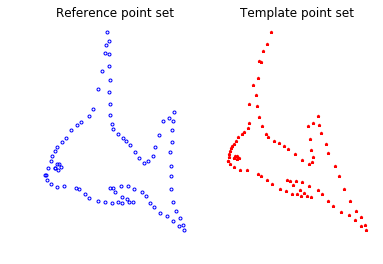

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import genfromtxt
X = genfromtxt('X1.csv', delimiter=',')
Y = genfromtxt('Y1.csv', delimiter=',')

plt.figure()
plt.subplot(121)
plt.plot(X[:,0],X[:,1],'bo',fillstyle='none',markersize=3)
plt.axis('off')
plt.title("Reference point set")

plt.subplot(122)
plt.plot(Y[:,0],Y[:,1],'r*',fillstyle='none',markersize=3)
plt.axis('off')
plt.title("Template point set")

Registration process : Template point set aligning with reference point set


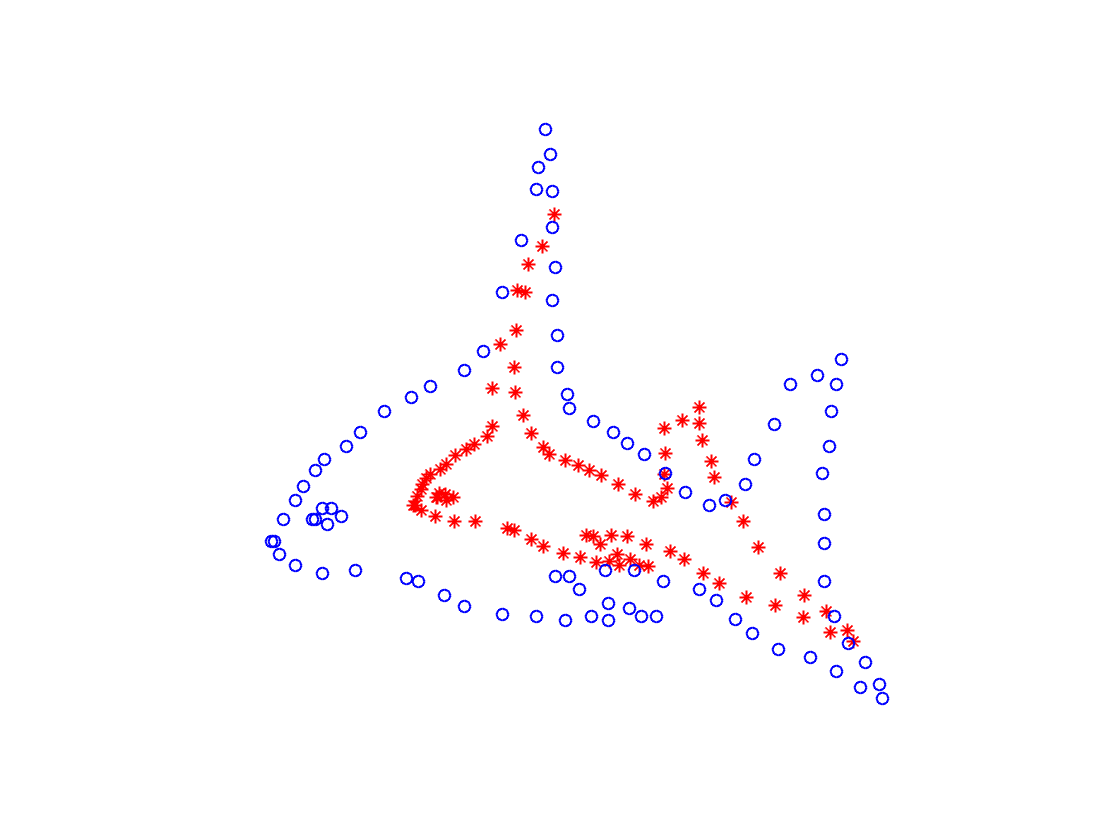

In [2]:
from IPython.display import Image
print('Registration process : Template point set aligning with reference point set')
display(Image(filename="cpd.gif",width=300,height=300))
